In [1]:
# 그래프에 한국어폰트 나오게
!pip install koreanize-matplotlib

     |████████████████████████████████| 7.9 MB 5.4 MB/s            


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'


In [3]:
home = os.getenv('HOME') + '/aiffel/datathon_apt/data/' # 로컬에서 사용할 때 사용 하고 각자의 경로에 맞게 설정
# home = '/content/drive/MyDrive/data/'

## EDA

In [5]:
park = pd.read_csv(home + 'park.csv')
daycare = pd.read_csv(home + 'day_care_center.csv')
train_df = pd.read_csv(home + 'train.csv')
test_df = pd.read_csv(home +'test.csv')

In [6]:
train_df.shape, test_df.shape, daycare.shape, park.shape

((1216553, 13), (5463, 12), (7551, 11), (1359, 13))

In [7]:
# 각 데이터프레임의 .head()를 순차적으로 표시
dataframe_names = ['train_df', 'test_df', 'park', 'daycare']

# 정의된 데이터프레임 리스트를 순회하며 display 함수로 출력
for name in dataframe_names:
    print(f"{name}.head():")
    display(eval(name).head())
    display(eval(name).info())
    print("\n")  # 데이터프레임 사이에 공백 줄 추가

train_df.head():


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

None



test_df.head():


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5463 non-null   int64  
 1   apartment_id            5463 non-null   int64  
 2   city                    5463 non-null   object 
 3   dong                    5463 non-null   object 
 4   jibun                   5463 non-null   object 
 5   apt                     5463 non-null   object 
 6   addr_kr                 5463 non-null   object 
 7   exclusive_use_area      5463 non-null   float64
 8   year_of_completion      5463 non-null   int64  
 9   transaction_year_month  5463 non-null   int64  
 10  transaction_date        5463 non-null   object 
 11  floor                   5463 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


None



park.head():


,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

None



daycare.head():


,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


None

### 아파트 데이터

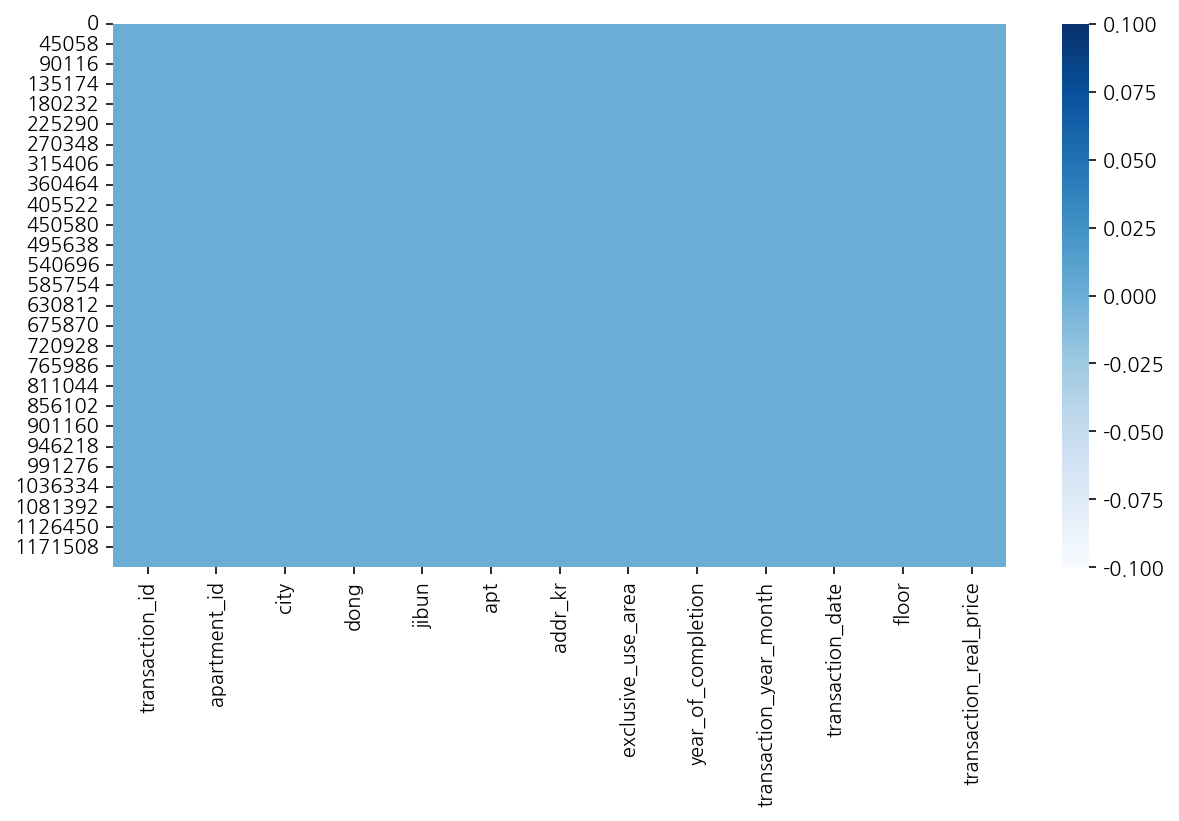

In [8]:
# 결측치 시각화
fig = plt.figure(figsize=(10, 5))
sns.heatmap(train_df.isnull(), cmap='Blues');

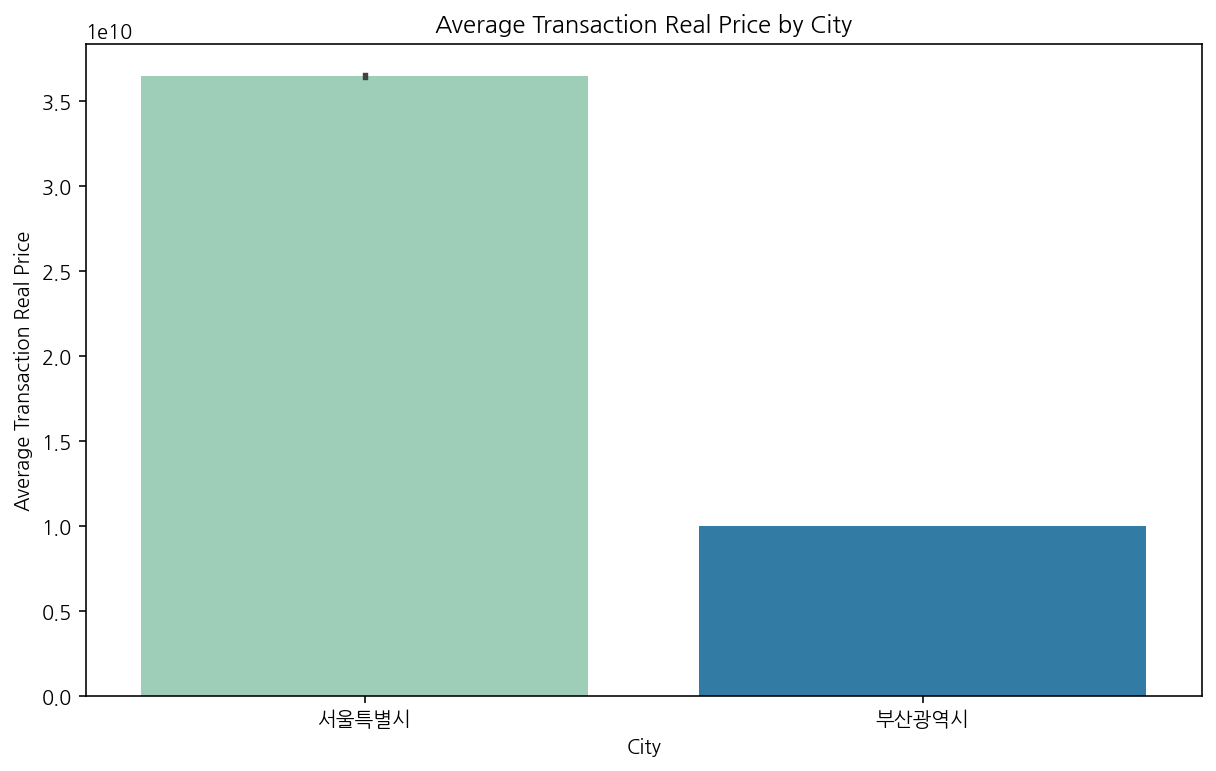

In [9]:
# 각 도시별 아파트 거래 가격의 평균 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='transaction_real_price', data=train_df, estimator=sum, palette='YlGnBu')
plt.title('Average Transaction Real Price by City')
plt.xlabel('City')
plt.ylabel('Average Transaction Real Price')
plt.show()



In [ ]:
# 아파트 가격 분포 시각화
plt.figure(figsize=(8, 6))
plt.hist(train_df['transaction_real_price'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Apartment Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


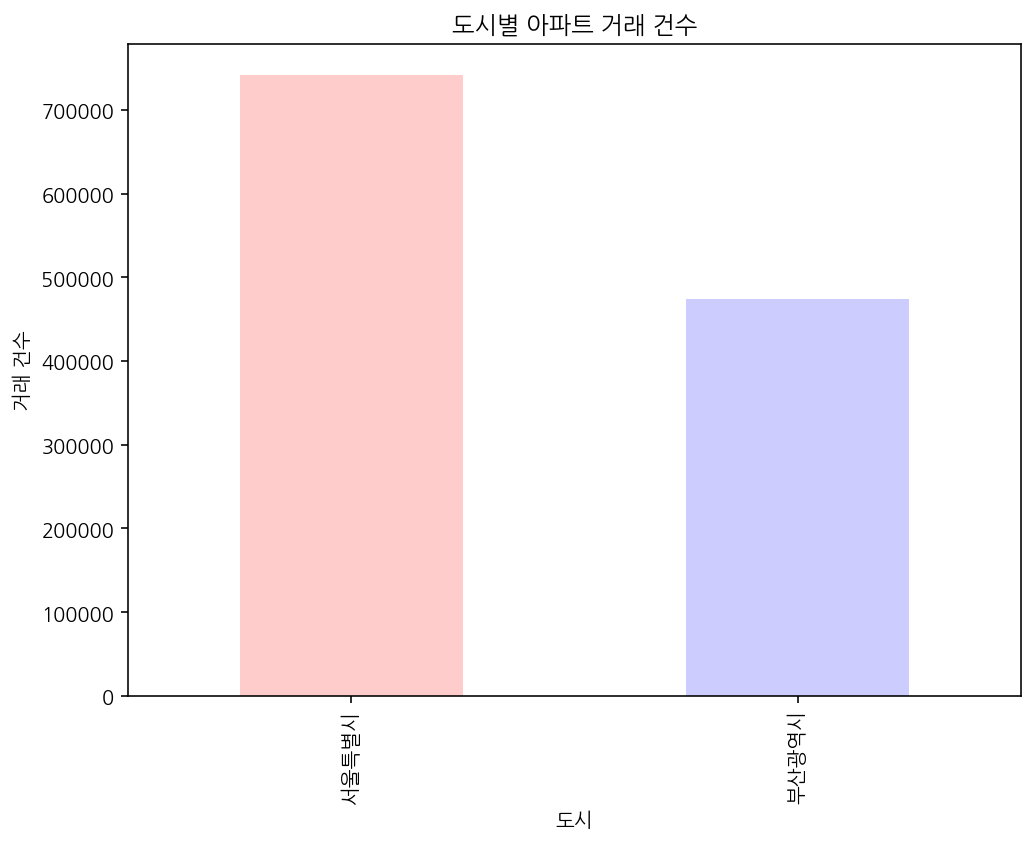

In [11]:
# 지역별 아파트 거래량
plt.figure(figsize=(8, 6))
train_df['city'].value_counts().plot(kind='bar', color=['red', 'blue'], alpha=0.2)
plt.title('도시별 아파트 거래 건수')
plt.xlabel('도시')
plt.ylabel('거래 건수')
plt.show()


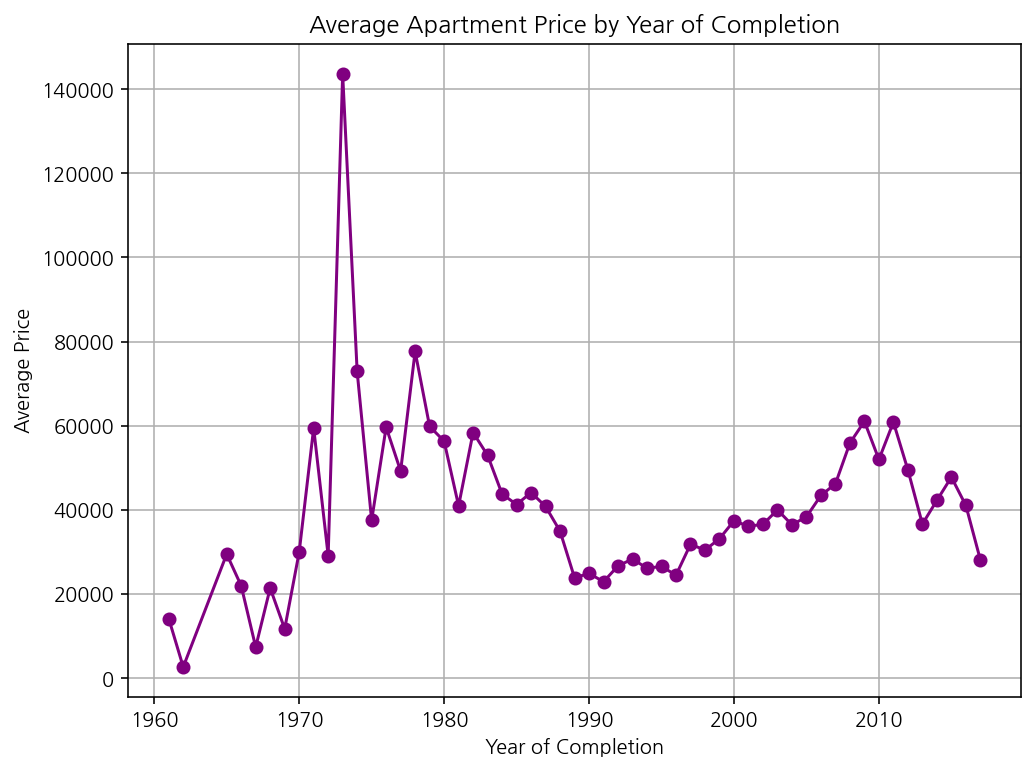

In [12]:
# 아파트 건축 연도별 변화 시각화
plt.figure(figsize=(8, 6))
train_df.groupby('year_of_completion')['transaction_real_price'].mean().plot(marker='o', color='purple')
plt.title('Average Apartment Price by Year of Completion')
plt.xlabel('Year of Completion')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


In [ ]:
# 'dong' 별 평균 가격 계산
train_df['dong_avg'] = train_df.groupby('dong')['transaction_real_price'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
train_df['dong_avg'].plot(kind='bar', color='skyblue')
plt.title('Average Price by Dong')
plt.xlabel('Dong')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

In [ ]:
corr = train_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
fig = plt.figure(figsize=(15, 13))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin = -1, vmax = 1, mask = mask)

In [ ]:
sns.pairplot(train_df, kind="kde")


In [ ]:
#boxplot 으로 outlier 확인
train_df.plot(kind="box", figsize=(12, 4))

In [5]:
import zipfile

home = os.getenv('HOME') +'/aiffel/datathon_apt/data/'

def unzip_file(zip_file_path, extract_to_path):
    """
    zip_file_path: 압축 파일의 경로
    extract_to_path: 압축을 푸는 경로
    """
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)

# 사용 예시
zip_file_path = home + 'train_merged.csv.zip' # 압축 파일 경로
extract_to_path = home  # 압축을 푸는 경로

unzip_file(zip_file_path, extract_to_path)

In [14]:
train_data = pd.read_csv('train_merged.csv', index_col=0)

In [15]:
train_data

,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_year,transaction_month,floor_category,daycare_가정,daycare_국공립,...,park_묘지공원,park_문화공원,park_소공원,park_수변공원,park_어린이공원,park_역사공원,park_체육공원,park_total,park_area,transaction_real_price
0,84.8200,2002,200801,2,2,2008,1,1,4.0,33.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,73929.5,37500
1,99.1700,1973,200801,1,6,2008,1,2,4.0,33.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,73929.5,20000
2,84.7400,2007,200801,1,6,2008,1,2,4.0,33.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,73929.5,38500
3,146.3900,2003,200801,0,15,2008,1,3,4.0,33.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,73929.5,118000
4,194.4300,2004,200801,2,3,2008,1,1,4.0,33.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,73929.5,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247760,59.8245,2012,201711,0,3,2017,11,1,90.0,44.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,73929.5,22000
1247761,84.9923,2012,201711,2,7,2017,11,2,90.0,44.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,73929.5,30750
1247762,84.9923,2012,201711,2,9,2017,11,2,90.0,44.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,73929.5,29500
1247763,101.7400,2008,201711,2,7,2017,11,2,90.0,44.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,73929.5,26700


In [18]:
from sklearn.model_selection import train_test_split

X = train_data.drop('transaction_real_price', axis=1)
y = train_data['transaction_real_price']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((998212, 30), (249553, 30), (998212,), (249553,))

R2 score: 0.6594154146566853
MAE: 11582.487327361676
MSE: 328686809.54465914
RMSE: 18129.72171724263


<AxesSubplot:xlabel='transaction_real_price'>

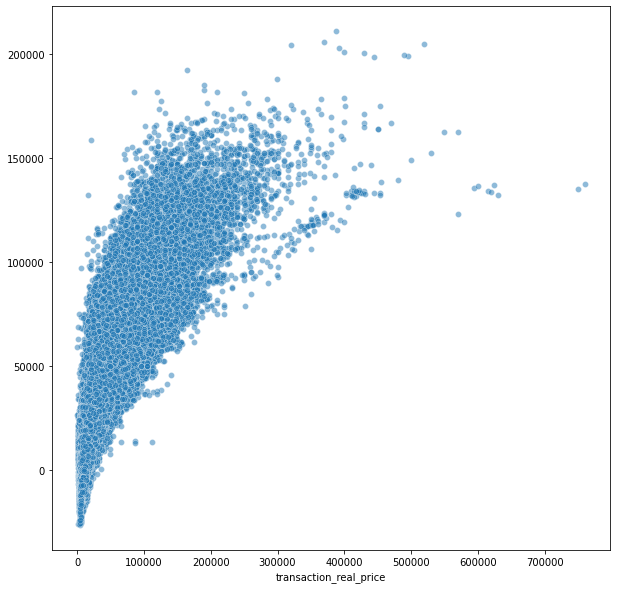

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=6.23706e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


R2 score: 0.6594154146566853
MAE: 11582.487327361676
MSE: 328686809.54465914
RMSE: 18129.72171724263


<AxesSubplot:xlabel='transaction_real_price'>

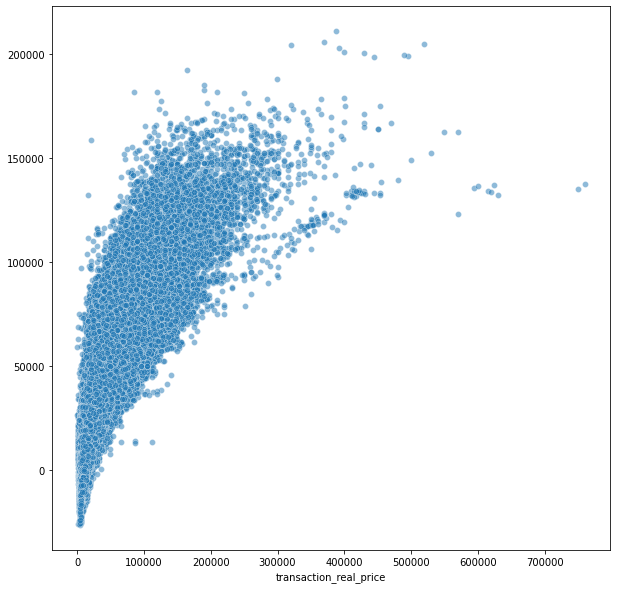

In [25]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.620e+14, tolerance: 9.503e+10
  model = cd_fast.enet_coordinate_descent(


R2 score: 0.6594154146566853
MAE: 11582.487327361676
MSE: 328686809.54465914
RMSE: 18129.72171724263


<AxesSubplot:xlabel='transaction_real_price'>

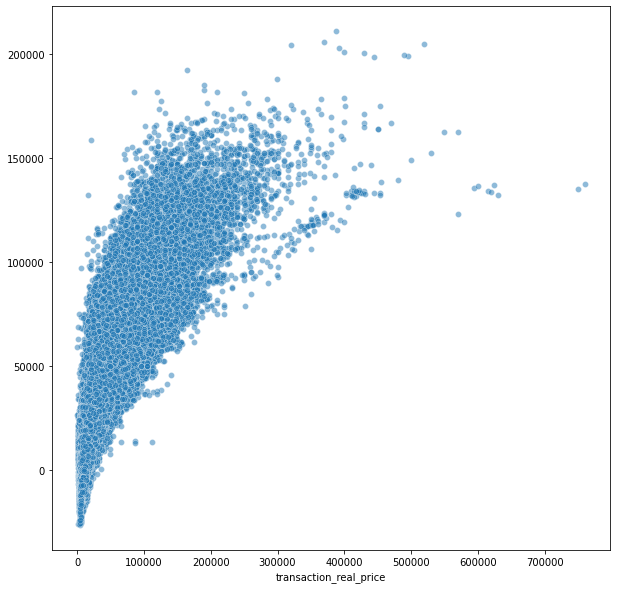

In [26]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

In [27]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train,y_train)
pred = model.predict(X_test)


print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.6594154146566853
MAE: 11582.487327361676
MSE: 328686809.54465914
RMSE: 18129.72171724263


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+14, tolerance: 9.503e+10
  model = cd_fast.enet_coordinate_descent(


In [28]:
ls

 국가철도공단_부산_지하철_주소데이터_20231109.csv
 전체_도시철도역사정보_20231231.xlsx
 city_gu_dong.csv
 전국초중등학교위치표준데이터.csv
 전국행정동리스트.csv
'서울시행정구역(동별).csv'
'부산시행정구역(동별).csv'
'서울교통공사 지하철역 주소 및 전화번호 정보.csv'
 day_care_center.csv
 fulldata_01_01_01_P_병원.csv
 hospital_data.csv
 __MACOSX/
 park.csv
 school_data.csv
 submission.csv
 subway_data.csv
 test.csv
 train2.csv
 train2.csv.zip
 train.csv
 train.csv.zip
'train_la&long.csv'
'train_la&long.zip'
 train_merged.csv
 train_merged.csv.zip
 국가철도공단_부산_지하철_주소데이터_20231109.csv
'부산시행정구역(동별).csv'
'서울교통공사 지하철역 주소 및 전화번호 정보.csv'
'서울시행정구역(동별).csv'
 전국초중등학교위치표준데이터.csv
 전국행정동리스트.csv
 전체_도시철도역사정보_20231231.xlsx


In [35]:
hospi = pd.read_csv('fulldata_01_01_01_P_병원.csv', encoding='cp949')
hospi

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,완화의료지정형태,완화의료담당부서명,구급차특수,구급차일반,총인원,구조사수,허가병상수,최초지정일자,관리주체,Unnamed: 45
0,1,병원,01_01_01_P,5340000,PHMA220125340030021200003,2012-11-30,NaN,1,영업/정상,13,...,NaN,NaN,0,0,NaN,NaN,0,NaN,시군구,NaN
1,2,병원,01_01_01_P,5340000,PHMA220135340030021200001,2013-11-11,NaN,1,영업/정상,13,...,NaN,NaN,0,0,NaN,NaN,0,NaN,시군구,NaN
2,3,병원,01_01_01_P,5340000,PHMA220165340030021200001,2016-01-28,NaN,1,영업/정상,13,...,NaN,NaN,0,0,NaN,NaN,0,NaN,시군구,NaN
3,4,병원,01_01_01_P,5380000,PHMA219895380021021200001,1989-03-31,NaN,1,영업/정상,13,...,NaN,NaN,0,0,NaN,NaN,0,NaN,시군구,NaN
4,5,병원,01_01_01_P,5410000,PHMA220185410012021200001,2018-03-16,NaN,1,영업/정상,13,...,NaN,NaN,0,0,NaN,NaN,0,NaN,시군구,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,8520,병원,01_01_01_P,6290000,200262900002000011,2002-11-12,NaN,3,폐업,3,...,NaN,NaN,0,0,NaN,NaN,0,NaN,시군구(위임),NaN
8520,8521,병원,01_01_01_P,6290000,198262900002000001,1982-03-06,NaN,3,폐업,3,...,NaN,NaN,0,0,NaN,NaN,0,NaN,시군구(위임),NaN
8521,8522,병원,01_01_01_P,6290000,198762900002000003,1987-12-30,NaN,3,폐업,3,...,NaN,NaN,0,0,NaN,NaN,0,NaN,시군구(위임),NaN
8522,8523,병원,01_01_01_P,6500000,200464900002000001,2004-04-20,NaN,3,폐업,3,...,NaN,NaN,0,0,NaN,NaN,0,NaN,시군구(위임),NaN


In [36]:
hospi = pd.read_csv('fulldata_01_01_01_P_병원.csv', encoding='cp949')
hospi[['소재지전체주소', '도로명전체주소']] 

,소재지전체주소,도로명전체주소
0,경상남도 사천시 사천읍 선인리 313번지 1호,"경상남도 사천시 사천읍 옥산로 127, 3~7층"
1,경상남도 사천시 사천읍 정의리 36번지 5호,경상남도 사천시 사천읍 구암두문로 74
2,경상남도 사천시 서동 72번지 1호,"경상남도 사천시 각산로 86 (서동, 미진예식장)"
3,경상남도 양산시 주진동 347-1,경상남도 양산시 모래들1길 91 (주진동)
4,경상남도 창녕군 고암면 중대리 235번지 1호 더케이서드에이지,"경상남도 창녕군 고암면 상대2길 16, 더케이서드에이지"
...,...,...
8519,광주광역시 북구 운암동 1078-11,NaN
8520,광주광역시 동구 대인동 312-15,NaN
8521,광주광역시 서구 농성동 645-23,NaN
8522,제주특별자치도 제주시 한림읍 대림리 1771-1,NaN


In [34]:
filtered_hospi = hospi[hospi['소재지전체주소'].str.contains('부산광역시|서울특별시', na=False) | hospi['도로명전체주소'].str.contains('부산광역시|서울특별시', na=False)][['소재지전체주소', '도로명전체주소']]
filtered_hospi

,소재지전체주소,도로명전체주소
88,서울특별시 중랑구 망우동 128-29 동부제일병원,"서울특별시 중랑구 망우로 511, 동부제일병원 지하1~6층 (망우동)"
89,서울특별시 중랑구 상봉동 108번지 2호,서울특별시 중랑구 면목로 473 (상봉동)
90,서울특별시 중랑구 망우동 488-8 장스여성병원 비동,"서울특별시 중랑구 용마산로117길 49, 장스여성병원 비동 (7층 일부제외)동 (망우동)"
91,NaN,서울특별시 중랑구 사가정로49길 53 (면목동)
92,서울특별시 중랑구 망우동 207번지 1호,"서울특별시 중랑구 망우로 474 (망우동, 조앤조병원)"
...,...,...
7607,서울특별시 송파구 오금동 126번지 송파참병원,"서울특별시 송파구 마천로 164, 송파참병원 (오금동)"
7608,서울특별시 송파구 오금동 77번지 인애가요양병원,"서울특별시 송파구 마천로15길 6, 인애가요양병원 (오금동)"
7609,서울특별시 서대문구 북아현동 126-22 우리내일병원,"서울특별시 서대문구 신촌로37길 10, 우리내일병원 지하4층~지하1층 ,4층~10층..."
7610,NaN,서울특별시 서대문구 세무서길 20 (홍제동)


In [ ]:
# statsmodels.api.OLS
# 릿지 회귀(Ridge Regression):

# sklearn.linear_model.Ridge
# 라쏘 회귀(Lasso Regression):

# sklearn.linear_model.Lasso
# 엘라스틱넷 회귀(ElasticNet Regression):

# sklearn.linear_model.ElasticNet
# 로지스틱 회귀(Logistic Regression):

# sklearn.linear_model.LogisticRegression
# 다항 회귀(Polynomial Regression):

# numpy.polyfit
# sklearn.preprocessing.PolynomialFeatures 와 sklearn.linear_model.LinearRegression
# 지원 벡터 머신 회귀(Support Vector Machine Regression):

# sklearn.svm.SVR
# 결정 트리 회귀(Decision Tree Regression):

# sklearn.tree.DecisionTreeRegressor
# 랜덤 포레스트 회귀(Random Forest Regression):

# sklearn.ensemble.RandomForestRegressor
# 그래디언트 부스팅 회귀(Gradient Boosting Regression):

# sklearn.ensemble.GradientBoostingRegressor
# 애드부스트 회귀(AdaBoost Regression):

# sklearn.ensemble.AdaBoostRegressor
# 배깅 회귀(Bagging Regression):

# sklearn.ensemble.BaggingRegressor